# Part 1: Power Law Transformation (Gamma Correction)

## Introduction

Power law transformation, commonly known as **gamma correction**, is a nonlinear intensity transformation technique used in digital image processing. It modifies pixel intensity values to enhance image brightness and contrast.

Gamma correction is widely used in:

- Image enhancement  
- Medical imaging  
- Computer vision applications  
- Display system calibration  

Unlike linear transformations, gamma correction applies an exponential relationship between input and output intensities.

---

## Mathematical Formula

The generalized formula for power law transformation is:

T(r) = c · r^γ

Where:

- **r** → Input pixel intensity (normalized between 0 and 1)  
- **T(r)** → Output (transformed) intensity  
- **γ (gamma)** → Power exponent  
- **c** → Intensity scaling constant  

### Understanding Gamma (γ)

- If γ < 1 → The image becomes **brighter** (nth root behavior).  
- If γ > 1 → The image becomes **darker** (nth power behavior).  
- If γ = 1 → The image remains unchanged.  

The parameter **c** controls overall intensity scaling.  
Note that this scaling constant is different from geometric scaling used in resizing operations.

---

## Why Normalization Is Required

Most digital images use 8-bit representation with pixel values ranging from 0 to 255.  
Before applying the power operation, the image must be normalized to the range [0, 1].

Without normalization, exponentiation would produce incorrect and excessively large values.

### Normalization Syntax in Python

```python
I_norm = I_in.astype('float32') / 255


### Explanation

- `astype('float32')` converts the image data type from integer (e.g., `uint8`) to floating-point format.  
  This is necessary because mathematical operations such as division and exponentiation require floating-point precision.  
  If the image remains in integer format, calculations may be truncated or rounded incorrectly.

- Dividing by `255` scales the pixel intensity values from the original range **[0, 255]** to the normalized range **[0, 1]**.  
  Normalization ensures that the power law transformation behaves correctly and prevents extremely large values when applying exponentiation.


## Applying the Power Transformation

After normalizing the image to the range [0, 1], the gamma transformation can be applied using the formula:

```python
I_gamma = c * (I_norm ** gamma)



For example, to apply a cube (power of 3) to the image:

This operation raises each pixel intensity value to the third power, modifying the brightness and contrast according to the gamma value.

```python
image_cube = image_input ** 3


## Required Function: `gamma_correction`

You are required to create a function named `gamma_correction` to perform gamma correction on an input image.

### Function Requirements

The function must:

1. **Take three inputs**:  
   - `c` → Intensity scaling constant  
   - `gamma` → Power exponent  
   - `I_in` → Input image  

2. **Normalize the input image**:

```python
I_norm = I_in.astype('float32') / 255

3. **Apply the power law transformation**:

```python
I_out = c * (I_norm ** gamma)


4. **Return the transformed image**:

```python
return I_out


# Example Implementation

```python
import numpy as np

def gamma_correction(I_in, c, gamma):
    # Step 1: Normalize image
    I_norm = I_in.astype('float32') / 255
    
    # Step 2: Apply power law transformation
    I_gamma = c * (I_norm ** gamma)
    
    # Step 3: Rescale back to 0–255 range and convert to uint8
    I_out = np.clip(I_gamma * 255, 0, 255).astype('uint8')
    
    return I_out


# Task 1: Gamma Correction on Images

## Objective

- Apply appropriate gamma values (γ) to each image in the shared folder.  
- Save screenshots of the output along with the source code.  
- Explain the reasoning for choosing γ for each image.  
- Experiment with saving the normalized image using `cv2.imwrite` and observe any issues.

---

## Steps to Perform Gamma Correction

1. **Import required libraries**

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Matplotlib is building the font cache; this may take a moment.


## Effect of Different Gamma Values

| Gamma Value | Effect on Image          |
|-------------|-------------------------|
| γ < 1       | Brightens dark regions  |
| γ = 1       | No change               |
| γ > 1       | Darkens the image       |


## 2. Define the Gamma Correction Function

You need to define a function named `gamma_correction` that performs the power law (gamma) transformation on an input image.  

The function should:

1. Take three inputs:  
   - `I_in` → Input image  
   - `c` → Intensity scaling constant  
   - `gamma` → Power exponent  

2. Normalize the input image to the range [0,1]  
3. Apply the power law transformation  
4. Return the transformed image


In [13]:
def gamma_correction(I_in, c, gamma):
    """
    Apply power law (gamma) transformation to an input image.

    Parameters:
    I_in : ndarray
        Input image (grayscale or color)
    c : float
        Intensity scaling constant
    gamma : float
        Gamma value (power exponent)

    Returns:
    I_out : ndarray
        Transformed image after gamma correction
    """
    # Normalize image to range [0,1]
    I_norm = I_in.astype('float32') / 255

    # Apply power law transformation
    I_gamma = c * (I_norm ** gamma)

    # Rescale to 0-255 and convert to uint8
    I_out = np.clip(I_gamma * 255, 0, 255).astype('uint8')

    return I_out


# Processing Images in the Shared Folder

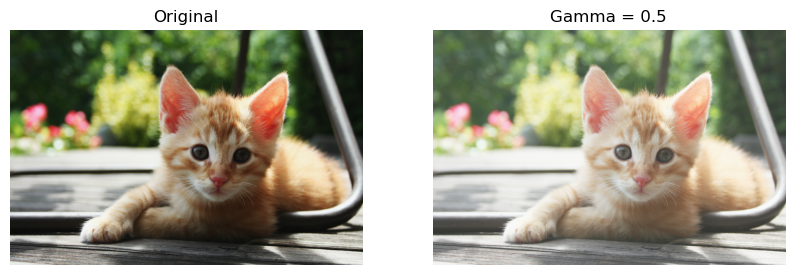

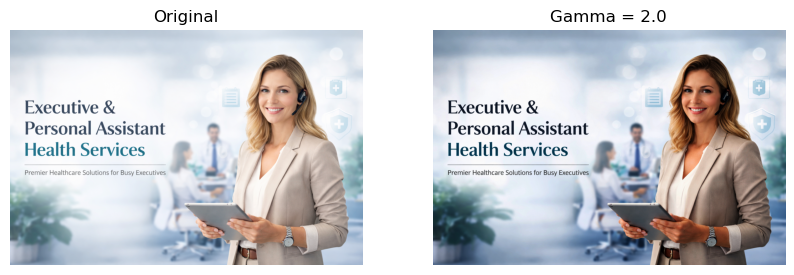

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(I_in, c, gamma):
    """
    Apply power law (gamma) transformation to an input image.
    """
    if I_in is None:
        return None

    # Normalize image to range [0,1]
    I_norm = I_in.astype('float32') / 255.0

    # Apply power law transformation
    I_gamma = c * (I_norm ** gamma)

    # Rescale to 0-255 and convert to uint8
    I_out = np.clip(I_gamma * 255, 0, 255).astype('uint8')

    return I_out


# Paths
image_folder = "/Users/behnamkiani/Downloads/"
output_folder = "/Users/behnamkiani/Downloads/"

os.makedirs(output_folder, exist_ok=True)

gamma_values = {
    "cat.jpg": 0.5,
    "111.png": 2.0,
}

c = 1.0

for img_name, gamma in gamma_values.items():
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    img_gamma = gamma_correction(img, c, gamma)

    # Save output
# Create the full file path for the output image.
# The new filename is created by adding "gamma_" before the original image name.
output_path = os.path.join(output_folder, f"gamma_{img_name}")

# Save the gamma-corrected image to disk at the specified output path.
cv2.imwrite(output_path, img_gamma)


    # Display comparison
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title(f"Gamma = {gamma}")
    plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()


# Part 2: Contrast Stretching

## Introduction

**Contrast stretching** is a linear intensity transformation technique used to enhance the contrast of an image. It works by expanding the range of intensity values in an image, making dark regions darker and bright regions brighter.  

This technique is particularly useful for:

- Images with poor lighting conditions  
- Washed-out images  
- Images with limited contrast  

By stretching the intensity range, features in the image become more distinguishable.

---

## Mathematical Formula

The general formula for contrast stretching is:

$$
s = \frac{(s_{max} - s_{min})}{(r_{max} - r_{min})} \cdot (r - r_{min}) + s_{min}
$$

Where:

- **s** → Output pixel intensity  
- **r** → Input pixel intensity  
- **r_min, r_max** → Minimum and maximum pixel intensities in the input image  
- **s_min, s_max** → Desired output intensity range (typically s_min = 0, s_max = L-1, where L = 256 for 8-bit images)  

This formula linearly maps the input intensity range [r_min, r_max] to the output range [s_min, s_max].

---

## Required Function: `contrast_stretching`

Create a function named `contrast_stretching` that performs linear contrast enhancement on an input image.

### Function Requirements

The function must:

1. Take the following inputs:  
   - `i_in` → Input image (grayscale or color)  
   - `s_min` → Minimum output intensity  
   - `s_max` → Maximum output intensity  

2. Compute the minimum and maximum intensity values of the input image:

```python
r_min = np.min(i_in)
r_max = np.max(i_in)


3. Apply contrast stretching using the formula:

```python
i_out = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min


4. Convert the output image to type uint8 (for 8-bit images) and return it.

# Example Implementation

```python
import cv2
import numpy as np

def contrast_stretching(i_in, s_min=0, s_max=255):
    """
    Apply linear contrast stretching to an input image.

    Parameters:
    i_in : ndarray
        Input image (grayscale or color)
    s_min : int
        Minimum output intensity (default 0)
    s_max : int
        Maximum output intensity (default 255)

    Returns:
    i_out : ndarray
        Output image after contrast stretching
    """
    # Step 1: Compute min and max intensity in input image
    r_min = np.min(i_in)
    r_max = np.max(i_in)
    
    # Step 2: Apply contrast stretching formula
    i_out = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min
    
    # Step 3: Convert to uint8 for proper image display
    i_out = np.clip(i_out, s_min, s_max).astype('uint8')
    
    return i_out


# Example Usage

```python
# Read grayscale image
img = cv2.imread("input_image.jpg", cv2.IMREAD_GRAYSCALE)

# Apply contrast stretching
img_stretched = contrast_stretching(img, s_min=0, s_max=255)

# Save and display the result
cv2.imwrite("contrast_stretched.jpg", img_stretched)

cv2.imshow("Original", img)
cv2.imshow("Contrast Stretched", img_stretched)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Task 2: Contrast Stretching on Images

## Objective

- Apply **contrast stretching** to all five provided images.  
- Compare the effects of **normalized** vs **non-normalized** images.  
- Experiment with different combinations of `s_min` and `s_max` for non-normalized images.  
- Record observations and analyze the impact of normalization and parameter choices.

---

## Steps

### 1. Import Required Libraries

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# 2. Contrast Stretching Function

In [23]:
def contrast_stretching(i_in, s_min=0, s_max=255):
    """
    Apply linear contrast stretching to an input image.

    Parameters:
    i_in : ndarray
        Input image (grayscale or color)
    s_min : float
        Minimum output intensity
    s_max : float
        Maximum output intensity

    Returns:
    i_out : ndarray
        Output image after contrast stretching
    """
    r_min = np.min(i_in)
    r_max = np.max(i_in)

    if r_max == r_min:
        # Avoid division by zero
        return np.zeros_like(i_in, dtype='uint8')

    i_out = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min
    i_out = np.clip(i_out, s_min, s_max).astype('uint8')

    return i_out


# 3. Load Images and Apply Contrast Stretching

In [27]:
# Paths
image_folder = "/Users/behnamkiani/Downloads/"
output_folder = "/Users/behnamkiani/Downloads/"
os.makedirs(output_folder, exist_ok=True)

# List of images
image_files = ["cat.jpg", "111.png"]

# 1) Non-normalized images with s_min=255, s_max=0
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply contrast stretching
    img_stretched = contrast_stretching(img, s_min=255, s_max=0)

    # Save output
    cv2.imwrite(os.path.join(output_folder, f"stretched_non_normalized_{img_name}"), img_stretched)


# 4. Normalized Images (0–1 Range)

In [28]:
# Normalize images and apply contrast stretching with s_min=0, s_max=1
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Normalize
    img_norm = img.astype('float32') / 255.0

    # Apply contrast stretching
    img_stretched_norm = contrast_stretching(img_norm, s_min=0, s_max=1)

    # Multiply by 255 to save as image
    cv2.imwrite(os.path.join(output_folder, f"stretched_normalized_{img_name}"), (img_stretched_norm * 255).astype('uint8'))


# 5. Experimenting with Various s_min and s_max

In [29]:
# Example combinations
combinations = [(0, 50), (100, 160)]

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    for s_min, s_max in combinations:
        img_stretch = contrast_stretching(img, s_min=s_min, s_max=s_max)
        out_name = f"{img_name}_smin{s_min}_smax{s_max}.jpg"
        cv2.imwrite(os.path.join(output_folder, out_name), img_stretch)


In [31]:
import os
import cv2
import numpy as np


def contrast_stretching(i_in, s_min=0, s_max=255):
    """
    Apply linear contrast stretching to an input image.

    Parameters:
    i_in : ndarray
        Input image (grayscale)
    s_min : float
        Minimum output intensity
    s_max : float
        Maximum output intensity

    Returns:
    i_out : ndarray
        Output image after contrast stretching
    """

    # Compute minimum and maximum intensity values of input image
    r_min = np.min(i_in)
    r_max = np.max(i_in)

    # Avoid division by zero if the image has constant intensity
    if r_max == r_min:
        return np.zeros_like(i_in, dtype='uint8')

    # Apply linear contrast stretching formula
    i_out = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min

    # Clip values to valid range and convert to uint8
    i_out = np.clip(i_out, s_min, s_max).astype('uint8')

    return i_out


# ==============================
# Define Paths
# ==============================

# Folder containing input images
image_folder = "/Users/behnamkiani/Downloads/"

# Folder to store processed images
output_folder = "/Users/behnamkiani/Downloads/contrast_outputs/"
os.makedirs(output_folder, exist_ok=True)

# List of images to process
image_files = ["cat.jpg", "111.png"]


# =====================================================
# 1) Contrast stretching (Non-normalized images)
#    Using inverted range: s_min=255, s_max=0
# =====================================================

for img_name in image_files:

    # Create full input image path
    img_path = os.path.join(image_folder, img_name)

    # Read image in grayscale mode
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Check if image loaded successfully
    if img is None:
        print(f"Could not load {img_name}")
        continue

    # Apply contrast stretching
    img_stretched = contrast_stretching(img, s_min=255, s_max=0)

    # Create output path with descriptive filename
    output_path = os.path.join(output_folder,
                               f"stretched_non_normalized_{img_name}")

    # Save processed image
    cv2.imwrite(output_path, img_stretched)


# =====================================================
# 2) Normalize image first, then stretch to [0,1]
# =====================================================

for img_name in image_files:

    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Could not load {img_name}")
        continue

    # Normalize image to range [0,1]
    img_norm = img.astype('float32') / 255.0

    # Apply contrast stretching in normalized range
    img_stretched_norm = contrast_stretching(img_norm, s_min=0, s_max=1)

    # Rescale back to [0,255] for saving as image
    img_save = (img_stretched_norm * 255).astype('uint8')

    output_path = os.path.join(output_folder,
                               f"stretched_normalized_{img_name}")

    cv2.imwrite(output_path, img_save)


# =====================================================
# 3) Apply different (s_min, s_max) combinations
# =====================================================

# Example output intensity ranges
combinations = [(0, 50), (100, 160)]

for img_name in image_files:

    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Could not load {img_name}")
        continue

    for s_min, s_max in combinations:

        # Apply contrast stretching with selected range
        img_stretch = contrast_stretching(img, s_min=s_min, s_max=s_max)

        # Generate descriptive output filename
        out_name = f"{img_name}_smin{s_min}_smax{s_max}.jpg"

        output_path = os.path.join(output_folder, out_name)

        # Save processed image
        cv2.imwrite(output_path, img_stretch)


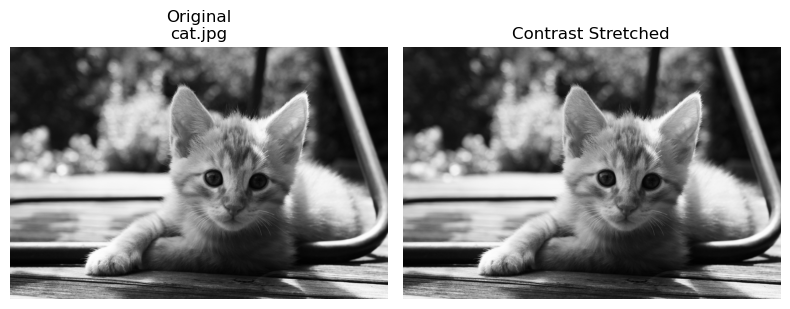

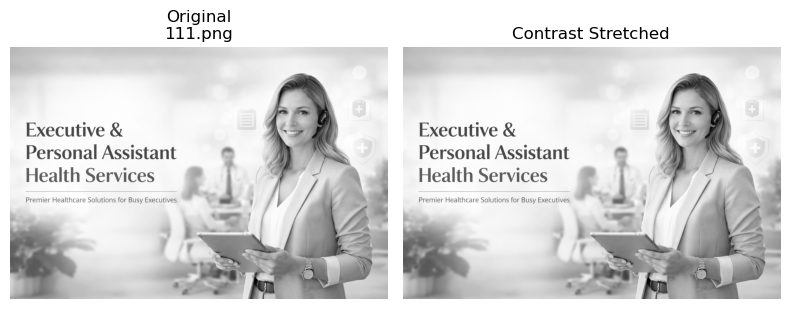

In [34]:
for img_name in image_files:

    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_stretch = contrast_stretching(img, s_min=0, s_max=255)

    # Create new figure for EACH image
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.title(f"Original\n{img_name}")
    plt.imshow(img, cmap='gray')
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Contrast Stretched")
    plt.imshow(img_stretch, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()


## Observations

### Non-normalized Images (`s_min=255, s_max=0`)
- Image contrast may appear inverted (dark regions become bright and vice versa).  
- Some details may become exaggerated or lost depending on the original intensity range.  

### Normalized Images (0–1 range, `s_min=0, s_max=1`)
- Contrast enhancement is smoother and more consistent.  
- Normalization prevents intensity clipping issues.  
- Fine details are preserved better than when working directly in the 0–255 range.  

### Different Combinations of `s_min` and `s_max` for Non-normalized Images

| Combination       | Observation                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `(s_min=0, s_max=50)`   | Overall image is very dark; subtle features are visible.               |
| `(s_min=100, s_max=160)` | Mid-intensity range enhanced; low and high extremes clipped; some contrast lost. |

### Conclusion
- Normalization generally improves numerical stability and ensures more consistent results.  
- The choice of `s_min` and `s_max` directly affects the output appearance. Careful selection is required to avoid clipping or washed-out effects.
